<html>
            <div style="font-size:7pt">
            This notebook may contain text, code and images generated by artificial intelligence.
            Used model: gpt-4o-2024-05-13,
            vision model: gpt-4o-2024-05-13,
            endpoint: None,
            bia-bob version: 0.17.0.
            It is good scientific practice to check the code and results it produces carefully.
            <a href="https://github.com/haesleinhuepf/bia-bob">Read more about code generation using bia-bob</a>.
            </div>
            </html>

## Analysis of Hela Cell Images

This notebook is designed for processing a fluorescence microscopy image of Hela cells.
Specifically, we will be segmenting the blue channel, which represents the cell nuclei.

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, measure, morphology
from scipy import ndimage as ndi

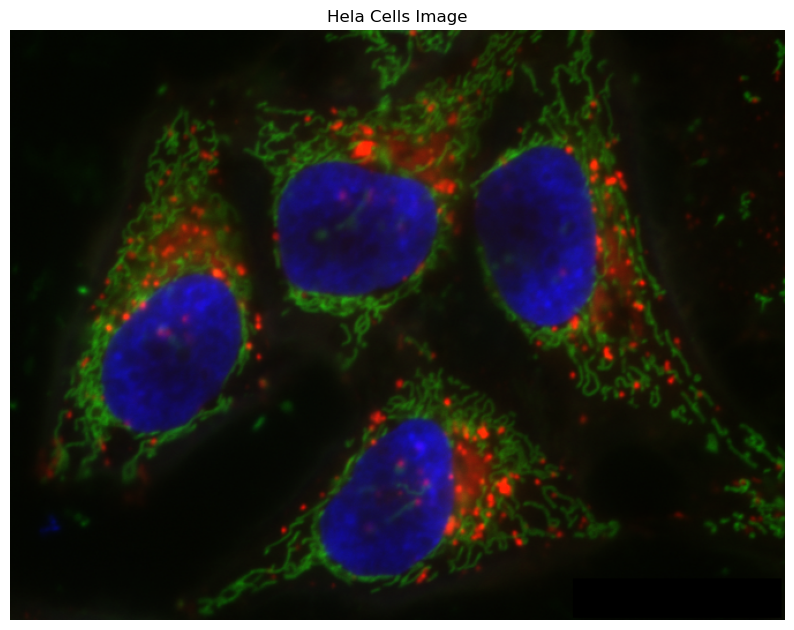

In [2]:
# Load the image
# This function reads the image file 'hela-cells-8bit.tif' and visualizes it.
image_path = 'hela-cells-8bit.tif'
image = io.imread(image_path)

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.title('Hela Cells Image')
plt.axis('off')
plt.show()

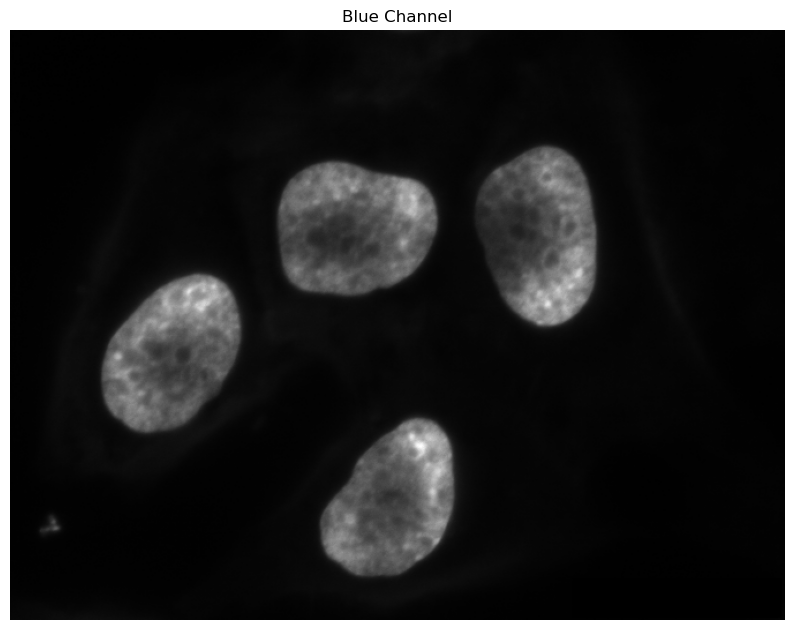

In [3]:
# Extract the blue channel
# Extracting the blue channel from the image
blue_channel = image[:, :, 2]

# Display the blue channel
plt.figure(figsize=(10, 10))
plt.imshow(blue_channel, cmap='gray')
plt.title('Blue Channel')
plt.axis('off')
plt.show()

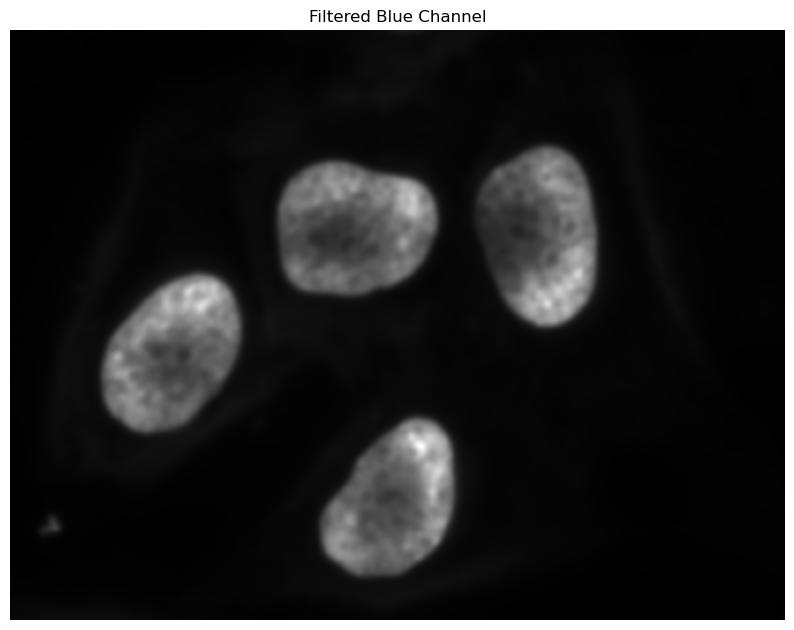

In [4]:
# Apply Gaussian filter
# Applying a Gaussian filter to reduce noise in the blue channel
filtered_image = filters.gaussian(blue_channel, sigma=2)

# Display the filtered image
plt.figure(figsize=(10, 10))
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Blue Channel')
plt.axis('off')
plt.show()

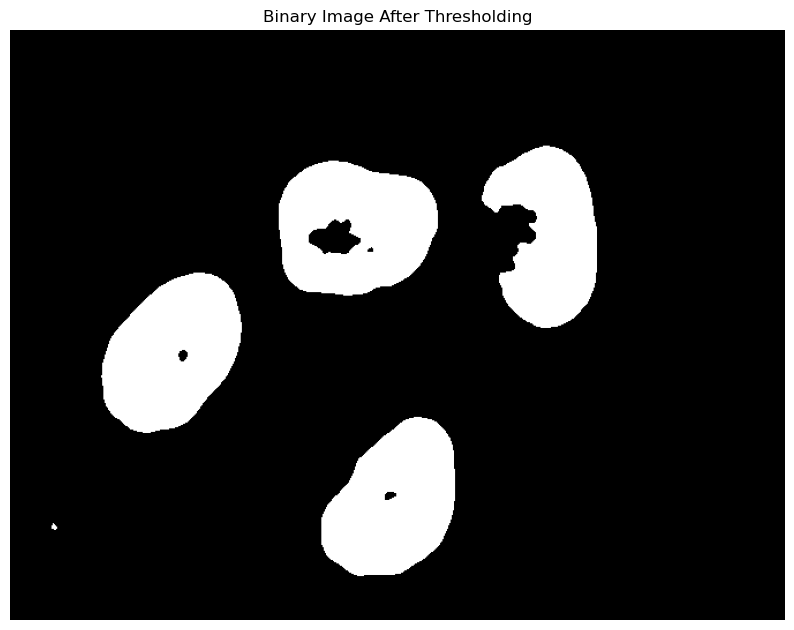

In [5]:
# Thresholding
# Applying Otsu's thresholding
thresh = filters.threshold_otsu(filtered_image)
binary_image = filtered_image > thresh

# Display the binary image
plt.figure(figsize=(10, 10))
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image After Thresholding')
plt.axis('off')
plt.show()

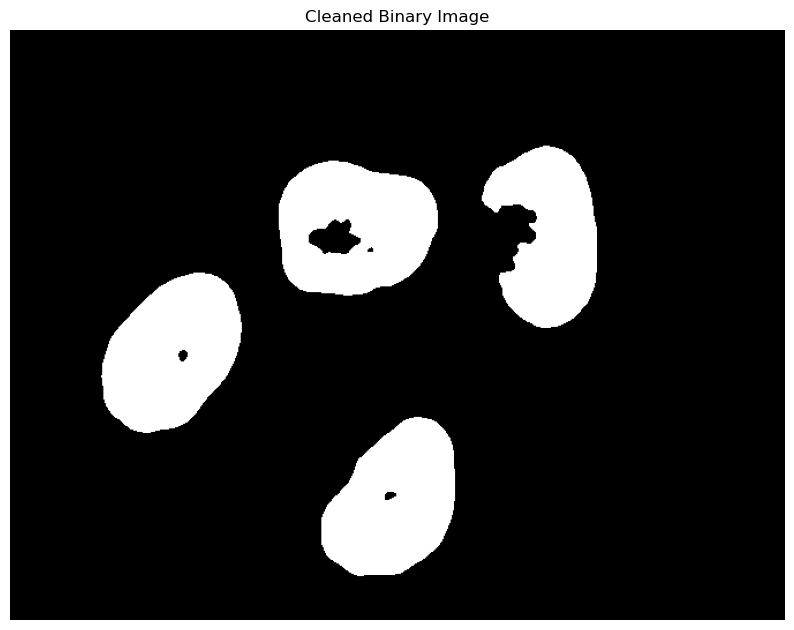

In [6]:
# Remove small objects
# Remove small objects from binary image
cleaned_image = morphology.remove_small_objects(binary_image, min_size=100)

# Display the cleaned binary image
plt.figure(figsize=(10, 10))
plt.imshow(cleaned_image, cmap='gray')
plt.title('Cleaned Binary Image')
plt.axis('off')
plt.show()

Number of objects detected: 4


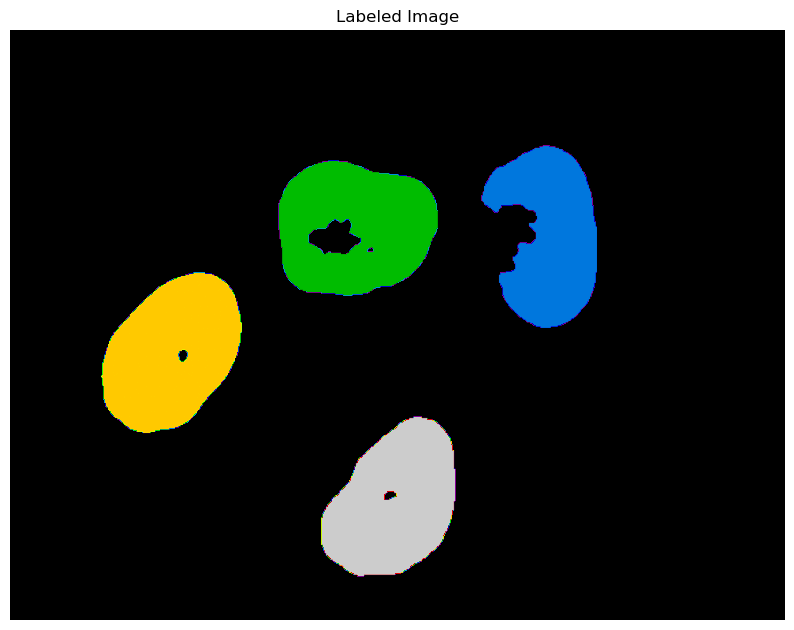

In [7]:
# Label connected components
# Label the connected components in the cleaned binary image
labeled_image, num_features = ndi.label(cleaned_image)
print(f'Number of objects detected: {num_features}')

# Display the labeled image
plt.figure(figsize=(10, 10))
plt.imshow(labeled_image, cmap='nipy_spectral')
plt.title('Labeled Image')
plt.axis('off')
plt.show()

In [8]:
# Measure properties of labeled regions
# Measure properties of labeled image regions
regions = measure.regionprops(labeled_image)

# Output some properties for each region
for region in regions:
    print(f'Region {region.label}: Area = {region.area}, Centroid = {region.centroid}')

Region 1: Area = 10465.0, Centroid = (178.6943143812709, 466.4435738174869)
Region 2: Area = 12081.0, Centroid = (171.63595728830396, 298.8211240791325)
Region 3: Area = 12023.0, Centroid = (280.3930799301339, 139.9413623887549)
Region 4: Area = 11460.0, Centroid = (409.54764397905757, 332.3322862129145)


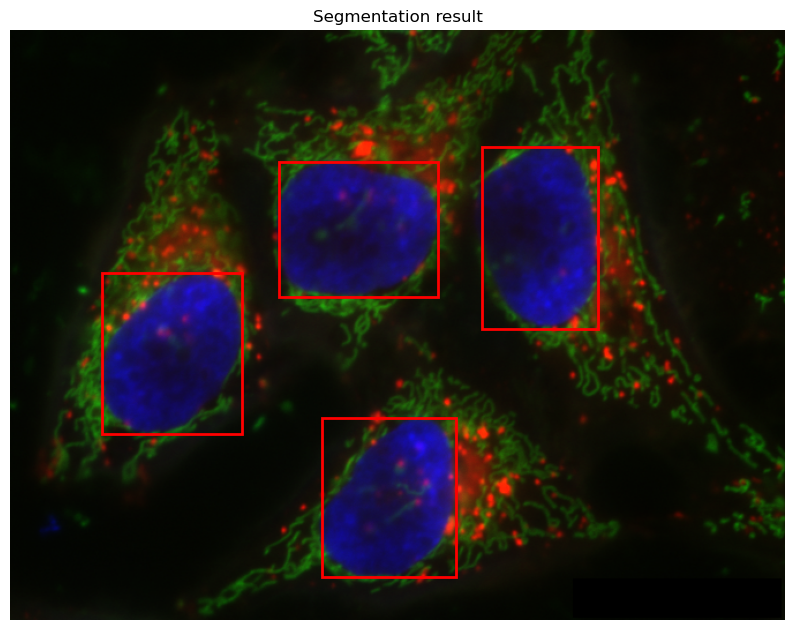

In [9]:
# Display final segmentation result
# Overlay the segmentation result on the original image

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(image)

for region in regions:
    # Draw bounding box
    minr, minc, maxr, maxc = region.bbox
    rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                         fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)

ax.set_title('Segmentation result')
ax.axis('off')
plt.show()